# 🧹 Data Cleaning & Feature Selection

In this notebook, we conduct an exploratory analysis to determine which columns should be retained for training our model.


In [134]:
import os
import json
from pathlib import Path
import pandas as pd
import json
import ast

These functions are used to collect the data retrieved from each of the requests made to the Idealista API.
In the production environment, the idea is that the same function responsible for making the API requests will also generate a file containing all the aggregated data.

In [2]:
from data_cleaning import merge_json_files, merge_json_files_2

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
extracted_data_path = "../data/extracted_data"
working_data_path = "../data/working_data"

In [5]:
#data = merge_json_files(extracted_data_path, working_data_path)

In [6]:
#data2 = merge_json_files_2(extracted_data_path, working_data_path)

In [7]:
df = pd.read_json("../data/working_data/merged_data.json")
df

,propertyCode,thumbnail,externalReference,numPhotos,price,priceInfo,propertyType,operation,size,rooms,...,highlight,savedAd,notes,topNewDevelopment,topPlus,floor,exterior,hasLift,newDevelopmentFinished,ubicationInfo
0,107634575,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/7a/ed/13/1333852019.webp,jn206265,72,985000,"{'price': {'amount': 985000.0, 'currencySuffix': '€'}}",chalet,sale,245.0,4.0,...,{'groupDescription': 'Top+'},{},[],False,True,NaN,NaN,NaN,NaN,NaN
1,106393537,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/63/aa/59/1314693219.webp,CLK00/4460,27,265000,"{'price': {'amount': 265000.0, 'currencySuffix': '€', 'priceDropInfo': {'formerPrice': 280000.0, 'priceDropValue': 15000, 'priceDropPercentage': 5}}}",flat,sale,66.0,2.0,...,{'groupDescription': 'Top+'},{},[],False,True,8,1.0,1.0,NaN,NaN
2,106281335,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/2c/af/01/1310230736.webp,CLK00/4433,36,275000,"{'price': {'amount': 275000.0, 'currencySuffix': '€', 'priceDropInfo': {'formerPrice': 280000.0, 'priceDropValue': 5000, 'priceDropPercentage': 2}}}",flat,sale,82.0,2.0,...,{'groupDescription': 'Top+'},{},[],False,True,1,1.0,1.0,NaN,NaN
3,107840913,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/02/46/50/1325936811.webp,vo207622,43,1600000,"{'price': {'amount': 1600000.0, 'currencySuffix': '€'}}",flat,sale,174.0,3.0,...,{'groupDescription': 'Top+'},{},[],False,True,1,1.0,1.0,NaN,NaN
4,97484253,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/11/33/42/1301595388.webp,007--13906,28,550000,"{'price': {'amount': 550000.0, 'currencySuffix': '€', 'priceDropInfo': {'formerPrice': 590000.0, 'priceDropValue': 40000, 'priceDropPercentage': 7}}}",flat,sale,143.0,3.0,...,{'groupDescription': 'Top+'},{},[],False,True,3,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,108708973,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/da/a1/6d/1352791752.webp,LJ5_053,19,2500,"{'price': {'amount': 2500.0, 'currencySuffix': '€/mes', 'priceDropInfo': {'formerPrice': 2900.0, 'priceDropValue': 400, 'priceDropPercentage': 14}}}",flat,rent,130.0,2.0,...,NaN,{},[],False,False,6,1.0,1.0,NaN,NaN
13054,105748777,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/b2/51/38/1263205154.webp,NaN,36,10000,"{'price': {'amount': 10000.0, 'currencySuffix': '€/mes'}}",duplex,rent,250.0,3.0,...,NaN,{},[],False,False,5,1.0,1.0,NaN,NaN
13055,108933214,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/3d/4d/82/1359339708.webp,ACUARIUM 213,38,1400,"{'price': {'amount': 1400.0, 'currencySuffix': '€/mes'}}",flat,rent,45.0,1.0,...,NaN,{},[],False,False,2,0.0,1.0,NaN,NaN
13056,108471740,https://img4.idealista.com/blur/480_360_mq/0/id.pro.es.image.master/55/72/b6/1345918847.webp,B15592,65,2600,"{'price': {'amount': 2600.0, 'currencySuffix': '€/mes'}}",flat,rent,97.0,2.0,...,NaN,{},[],False,False,1,1.0,1.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13058 entries, 0 to 13057
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            13058 non-null  int64  
 1   thumbnail               13036 non-null  object 
 2   externalReference       10263 non-null  object 
 3   numPhotos               13058 non-null  int64  
 4   price                   13058 non-null  int64  
 5   priceInfo               13058 non-null  object 
 6   propertyType            13058 non-null  object 
 7   operation               13058 non-null  object 
 8   size                    11969 non-null  float64
 9   rooms                   8750 non-null   float64
 10  bathrooms               11969 non-null  float64
 11  address                 13058 non-null  object 
 12  province                13058 non-null  object 
 13  municipality            13058 non-null  object 
 14  district                12817 non-null

To determine which features we want to keep, we will take a closer look at some of the columns to fully understand the type of data available.  

For instance, there are several columns that can be safely removed either because they are not useful for our model or because they contain a significant amount of missing values. These include:  

`[propertyCode, thumbnail, externalReference, numPhotos, priceInfo, showAddress, address, url, distance, description, hasVideo, change, suggestedTexts, hasPlan, has3DTour, has360, hasStaging, highlight, savedAd, notes, exterior, newDevelopmentFinished, ubicationInfo]`  

Additionally, the columns `province` and `country` are unnecessary for our model, as they contain the same constant value across all rows. This is due to the fact that the dataset only includes properties from the province of Málaga, Spain.

We are going to keep the propertyCode column until the end, as it is an id column, in order to make sure that the data is no duplicated.

In [9]:
drop_columns = [ "thumbnail", "externalReference", "numPhotos", "priceInfo", "showAddress", "address", "url", "province", "country", "hasVideo", "change", "hasPlan", "has3DTour", "has360", "hasStaging", "highlight", "savedAd", "notes", "distance", "description", "suggestedTexts", "exterior", "ubicationInfo", "newDevelopmentFinished"]
df_selectedColumns = df.drop(columns=drop_columns)


In [10]:
df_selectedColumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13058 entries, 0 to 13057
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   propertyCode       13058 non-null  int64  
 1   price              13058 non-null  int64  
 2   propertyType       13058 non-null  object 
 3   operation          13058 non-null  object 
 4   size               11969 non-null  float64
 5   rooms              8750 non-null   float64
 6   bathrooms          11969 non-null  float64
 7   municipality       13058 non-null  object 
 8   district           12817 non-null  object 
 9   neighborhood       9299 non-null   object 
 10  latitude           13058 non-null  float64
 11  longitude          13058 non-null  float64
 12  status             11927 non-null  object 
 13  newDevelopment     13058 non-null  bool   
 14  parkingSpace       6582 non-null   object 
 15  priceByArea        12842 non-null  float64
 16  detailedType       130

The following columns are considered essential and will be retained for model training:  

- `price`  
- `propertyType`  
- `operation`  
- `size`  
- `rooms`  
- `bathrooms`  
- `municipality`  
- `district`  
- `neighborhood`  
- `latitude`  
- `longitude`  
- `parkingSpace`  
- `priceByArea`  
- `floor`  
- `hasLift`  

In addition to the selected features, we will further analyze the following columns in order to better understand the type of information they store and evaluate their usefulness in the model:  

`[status, parkingSpace, detailedType, newDevelopment, topNewDevelopment, topPlus, floor, hasLift]`


#### Check for missing values in the 'status' column

In [11]:
df_selectedColumns["status"].value_counts()

status
good              10728
renew               706
newdevelopment      493
Name: count, dtype: int64

We are going to verify whether all the entries with `newDevelopment = true` are correctly labeled in the `status` column.


In [12]:
df_selectedColumns["newDevelopment"].value_counts()

newDevelopment
False    12483
True       575
Name: count, dtype: int64

In [13]:
# Filter rows where status == "newDevelopment"
status_new_dev = df_selectedColumns[df_selectedColumns["status"] == "newdevelopment"]

# Check if all of them have newDevelopment == True
all_ok = (status_new_dev["newDevelopment"] == True).all()

if all_ok:
    print("✅ All rows with status = 'newdevelopment' also have newDevelopment = True")
else:
    print("❌ Some rows with status = 'newDevelopment' do not have newDevelopment = True")
    # Optional: show the problematic rows
    print(status_new_dev[status_new_dev["newDevelopment"] != True])

✅ All rows with status = 'newdevelopment' also have newDevelopment = True


Update rows where status is empty (NaN) and newDevelopment is True.

In [14]:
df_selectedColumns.loc[df_selectedColumns["status"].isna() & (df_selectedColumns["newDevelopment"] == True), "status"] = "newdevelopment"

In [15]:
count_new_dev = df_selectedColumns[df_selectedColumns["status"] == 'newdevelopment'].shape[0]
print(f"Number of rows with status = 'newDevelopment': {count_new_dev}")

Number of rows with status = 'newDevelopment': 575


In [16]:
df_selectedColumns["status"].isna().sum()

np.int64(1049)

Now we have many missing values. Let's group the data by propertyType to investigate whether there is any relationship with the missing values and to explore how we could fill them.

In [17]:
# Group by propertyType and count missing values per column
null_status_counts = df_selectedColumns.groupby("propertyType")["status"].apply(lambda x: x.isnull().sum()).reset_index()
null_status_counts.columns = ["propertyType", "null_status_count"]
print(null_status_counts)

   propertyType  null_status_count
0        chalet                  0
1  countryHouse                  0
2        duplex                  0
3          flat                  0
4        garage               1049
5        office                  0
6     penthouse                  0
7       premise                  0
8        studio                  0


We can see that all the rows with an unknown status are garages, so we will fill all these null values with "unknown".

In [18]:
df_selectedColumns.loc[df_selectedColumns["status"].isna(), "status"] = "unknown"

#### Analyzing the "parkingSpace" Column

In [19]:
df_selectedColumns["parkingSpace"]

0        {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
1                                                                     NaN
2                                                                     NaN
3        {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
4                                                                     NaN
                                       ...                               
13053                                                                 NaN
13054    {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
13055    {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
13056    {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
13057    {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
Name: parkingSpace, Length: 13058, dtype: object

As we can observe, the non-null values in the *parkingSpace* column contain a dictionary with the keys `hasParkingSpace` and `isParkingSpaceIncludedInPrice`.  
Our approach will be the following:  

1. Create two new columns to store the values of these keys.  
2. Remove the original `parkingSpace` column, as it will no longer be needed.  
3. Replace all null values with `False` to ensure data consistency.  

In [20]:
# All values as dict
df_selectedColumns["parkingSpace"] = df_selectedColumns["parkingSpace"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Creating the new columns
df_selectedColumns["hasParkingSpace"] = df_selectedColumns["parkingSpace"].apply(lambda x: x["hasParkingSpace"] if pd.notna(x) else None)
df_selectedColumns["isParkingSpaceIncludedInPrice"] = df_selectedColumns["parkingSpace"].apply(lambda x: x.get("isParkingSpaceIncludedInPrice") if pd.notna(x) else None)

# Dropping the original column
df_selectedColumns = df_selectedColumns.drop(columns=["parkingSpace"])

# Filling NaN values with False
df_selectedColumns["hasParkingSpace"] = df_selectedColumns["hasParkingSpace"].fillna(False).astype(bool)
df_selectedColumns["isParkingSpaceIncludedInPrice"] = df_selectedColumns["isParkingSpaceIncludedInPrice"].fillna(False).astype(bool)

C:\Users\stefa\AppData\Local\Temp\ipykernel_19920\2809080702.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selectedColumns["hasParkingSpace"] = df_selectedColumns["hasParkingSpace"].fillna(False).astype(bool)
C:\Users\stefa\AppData\Local\Temp\ipykernel_19920\2809080702.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selectedColumns["isParkingSpaceIncludedInPrice"] = df_selectedColumns["isParkingSpaceIncludedInPrice"].fillna(False).astype(bool)


#### Analyzing the "detailedType" column

In [21]:
df_selectedColumns["detailedType"]

0        {'typology': 'chalet', 'subTypology': 'terracedHouse'}
1                                          {'typology': 'flat'}
2                                          {'typology': 'flat'}
3                                          {'typology': 'flat'}
4                                          {'typology': 'flat'}
                                  ...                          
13053                                      {'typology': 'flat'}
13054             {'typology': 'flat', 'subTypology': 'duplex'}
13055                                      {'typology': 'flat'}
13056                                      {'typology': 'flat'}
13057                                      {'typology': 'flat'}
Name: detailedType, Length: 13058, dtype: object

In [22]:
df_selectedColumns["detailedType"].apply(lambda x: x["typology"]).unique()

array(['chalet', 'flat', 'countryHouse', 'office', 'premise', 'garage'],
      dtype=object)

In [23]:
df_selectedColumns["propertyType"].value_counts()

propertyType
flat            4893
chalet          2652
premise         2214
garage          1089
office          1005
penthouse        571
duplex           403
studio           183
countryHouse      48
Name: count, dtype: int64

In [24]:
df_selectedColumns["detailedType"].apply(
    lambda x: x.get("subTypology") if isinstance(x, dict) else None
).unique()

array(['terracedHouse', None, 'penthouse', 'independantHouse',
       'semidetachedHouse', 'studio', 'duplex', 'masia',
       'commercialProperty', 'industrialPremise', 'carAndMotorcycle',
       'sedanCar', 'compactCar', 'twoCars', 'motorcycle', 'casale',
       'caseron', 'countryHouse', 'cortijo', 'casaDePueblo'], dtype=object)

We will create a new column containing the value of `subTypology` from the `detailedType` field, and we will overwrite the original `detailedType` column with this content.  

However, to properly evaluate its relevance, we will train two separate models: one without this column and another including it. This approach will allow us to assess whether incorporating this column provides valuable information for the model, either because users of the application may populate it or because it may enhance the predictive performance.


In [25]:
df_selectedColumns["detailedType"] = df_selectedColumns["detailedType"].apply(
    lambda x: x.get("subTypology") if pd.notna(x) and isinstance(x, dict) and "subTypology" in x else (
        x.get("typology") if pd.notna(x) and isinstance(x, dict) and "typology" in x else None
    )
)

print(df_selectedColumns["detailedType"].value_counts())
print(df_selectedColumns["detailedType"].isna().sum())

detailedType
flat                  4893
commercialProperty    1978
independantHouse      1667
office                1005
terracedHouse          604
penthouse              571
sedanCar               532
duplex                 403
semidetachedHouse      328
garage                 295
industrialPremise      209
studio                 183
carAndMotorcycle       114
compactCar              64
chalet                  53
twoCars                 45
motorcycle              39
countryHouse            29
premise                 27
casale                   9
masia                    3
caseron                  3
cortijo                  2
casaDePueblo             2
Name: count, dtype: int64
0


In [26]:
# Group by propertyType and collect unique values from detailedType
detailed_by_type = (
    df_selectedColumns.groupby("propertyType")["detailedType"]
      .unique()
      .reset_index()
)

# Display nicely
for _, row in detailed_by_type.iterrows():
    print(f"\nProperty Type: {row['propertyType']}")
    print(f"Detailed Types: {row['detailedType']}")



Property Type: chalet
Detailed Types: ['terracedHouse' 'independantHouse' 'semidetachedHouse' 'chalet']

Property Type: countryHouse
Detailed Types: ['masia' 'casale' 'caseron' 'countryHouse' 'cortijo' 'casaDePueblo']

Property Type: duplex
Detailed Types: ['duplex']

Property Type: flat
Detailed Types: ['flat']

Property Type: garage
Detailed Types: ['carAndMotorcycle' 'sedanCar' 'compactCar' 'garage' 'twoCars'
 'motorcycle']

Property Type: office
Detailed Types: ['office']

Property Type: penthouse
Detailed Types: ['penthouse']

Property Type: premise
Detailed Types: ['commercialProperty' 'premise' 'industrialPremise']

Property Type: studio
Detailed Types: ['studio']


#### Analyzing newDevelopment, topNewDevelopment and topPlus

We want to investigate whether there are significant differences between listings that only have newDevelopment = True and those that also include topNewDevelopment. Our goal is to evaluate if this distinction has a meaningful impact on property prices, or if the topNewDevelopment column does not provide substantial value for our model.

In [27]:
df_selectedColumns["topNewDevelopment"].value_counts()

topNewDevelopment
False    13058
Name: count, dtype: int64

We are going to discard this column since all of its values are identical.

In [28]:
df_selectedColumns = df_selectedColumns.drop(columns=["topNewDevelopment"])

In [29]:
df_selectedColumns["topPlus"].value_counts()

topPlus
False    12881
True       177
Name: count, dtype: int64

There are very few observations with the value set to True, and the exact meaning of this column is not entirely clear. Therefore, the best option is to remove it.


In [30]:
df_selectedColumns = df_selectedColumns.drop(columns=["topPlus"])

#### Analyzing floor and hasLift

In [31]:
df_selectedColumns["floor"].value_counts()

floor
bj     2969
1      1856
2      1273
3       821
4       448
5       316
6       193
7       129
en      117
8        83
-1       78
st       77
9        53
10       53
-2       39
11       23
ss       18
17       17
18       16
12       15
26       14
15       10
27       10
23       10
19        9
24        8
14        7
20        7
22        7
13        5
16        5
28        4
25        4
ati       2
21        1
Name: count, dtype: int64

The first thing we observe is that the floor column contains both numeric values (int) and alphanumeric values (string). In order to standardize the information, we will proceed to map these values.

Specifically:

- bj corresponds to ground floor (bajo)
- ati corresponds to attic (ático)
- en corresponds to mezzanine (entreplanta)
- st corresponds to basement (sótano)
- ss corresponds to semi-basement (semi-sótano)

In [32]:
# Group by propertyType and collect unique values from floor
floor_by_type = (
    df_selectedColumns.groupby("propertyType")["floor"]
      .unique()
      .reset_index()
)

# Display nicely
for _, row in floor_by_type.iterrows():
    print(f"\nProperty Type: {row['propertyType']}")
    print(f"Floor values: {row['floor']}")


Property Type: chalet
Floor values: [nan]

Property Type: countryHouse
Floor values: [nan 'bj']

Property Type: duplex
Floor values: ['1' '13' '7' '3' 'bj' '2' '9' '4' '5' nan 'st' '6' '-1' 'en' '21']

Property Type: flat
Floor values: ['8' '1' '3' '7' '2' nan 'bj' '26' '6' '4' '9' '5' '10' '18' '17' '16'
 '20' '14' '23' 'en' '24' '11' '28' '12' '19' '27' '15' '13' '25' '22'
 'ati']

Property Type: garage
Floor values: [nan 'st' '-1' 'bj' '-2' '1' '3' '2']

Property Type: office
Floor values: ['1' '5' 'bj' '4' '3' 'en' '2' nan '6' '7' '8' '9' '-2' 'ss' '-1']

Property Type: penthouse
Floor values: ['4' '2' '6' '5' '9' '7' '3' '1' nan '10' '8' '17' '11' '14']

Property Type: premise
Floor values: ['ss' 'bj' nan '-1' 'en' '1' '2' '3' 'st' '4']

Property Type: studio
Floor values: ['bj' '2' nan '5' '1' '4' '3' '7' '6' 'en' '9' '12' '8' '10' '11']


In [33]:
df_selectedColumns[(df_selectedColumns["floor"]=="ati") & (df_selectedColumns["propertyType"]=="penthouse")].shape[0]

0

When analyzing data consistency, we found that the rows where floor equals `ati` do not match those where propertyType is `penthouse`. This may be due to the fact that not all attics are considered penthouses.

Since there are only two records with the value ati in the floor column, we decided to remove them in order to maintain dataset consistency.

In [34]:
df_selectedColumns = df_selectedColumns[df_selectedColumns["floor"] != "ati"]

We do a mapping in order to have all the values of floor as type int. And missing values are handled based on the property type:

- For chalet, countryHouse, office, or premises, missing values are filled with 0 (ground floor).
- For garages, missing values are filled with -1 (basement/semi-basement).
- For other property types, missing values are filled with the most frequent floor (mode) for that type.

This approach combines simple business rules with statistical imputation to keep the data consistent.

In [35]:
mapping_floor = {
    "bj": 0,
    "en": 0.5,  
    "st": -1,  
    "ss": -0.5    
}

df_selectedColumns["floor"] = df_selectedColumns["floor"].replace(mapping_floor)

def fill_floor(row, modes):
    if pd.isna(row["floor"]):
        if row["propertyType"] in ["chalet","countryHouse","office","premise"]:
            return 0
        elif row["propertyType"] == "garage":
            return -1
        else:
            return modes.get(row["propertyType"], 0)
    else:
        return row["floor"]

# Calculate floor by propertyType
modes = (df_selectedColumns.groupby("propertyType")["floor"]
           .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
           .to_dict())

# Apply fill_floor function to complete de na values
df_selectedColumns["floor"] = df_selectedColumns.apply(lambda r: fill_floor(r, modes), axis=1)
df_selectedColumns["floor"] = pd.to_numeric(df_selectedColumns["floor"], errors="coerce")


In [36]:
# Group by propertyType and collect unique values from hasLift
hasLift_by_type = (
    df_selectedColumns.groupby("propertyType")["hasLift"]
      .unique()
      .reset_index()
)

# Display nicely
for _, row in hasLift_by_type.iterrows():
    print(f"\nProperty Type: {row['propertyType']}")
    print(f"hasLift values: {row['hasLift']}")


Property Type: chalet
hasLift values: [nan]

Property Type: countryHouse
hasLift values: [nan]

Property Type: duplex
hasLift values: [1. 0.]

Property Type: flat
hasLift values: [ 1.  0. nan]

Property Type: garage
hasLift values: [ 1.  0. nan]

Property Type: office
hasLift values: [0. 1.]

Property Type: penthouse
hasLift values: [1. 0.]

Property Type: premise
hasLift values: [nan]

Property Type: studio
hasLift values: [0. 1.]


For the ``hasLift`` column, we also have many missing values. It is reasonable to assume that high-rise buildings are likely to have an elevator, while lower floors are less likely to have one. Additionally, new developments almost always have elevators.
- For chalets and country houses, we will assign 0 (no elevator).
 - For the remaining properties:
    - If newDevelopment is True, we assign True for hasLift.
    - If newDevelopment is False, we check the floor:
        - Floors above 6 are assigned True.
        - Floors 6 or below are assigned False.

In [37]:
def fill_hasLift(row):
    # Rule 1: Chalets and country houses -> no lift
    if row["propertyType"] in ["chalet", "countryHouse"]:
        return 0
    # Rule 2: New developments -> has lift
    elif row.get("newDevelopment") == True:
        return 1
    # Rule 3: Older properties -> check floor
    elif pd.notna(row.get("floor")):
        if row["floor"] > 6:
            return 1
        else:
            return 0
    # Fallback if floor is missing
    else:
        return 0

# Apply the function to the dataframe
df_selectedColumns["hasLift"] = df_selectedColumns.apply(fill_hasLift, axis=1)

### Filling missing values

We have selected the features to be used and reviewed some of them that required adjustments to their data types.  
The next step is to fill the missing values in the following features:  
`size`, `rooms`, `bathrooms`, `district`, `neighborhood`, `priceByArea` 


#### Filling missing values for `rooms`, `bathrooms` and `size`

In [38]:
# Group by propertyType and collect unique values from rooms
rooms_by_type = (
    df_selectedColumns.groupby("propertyType")["rooms"]
      .unique()
      .reset_index()
)

# Display nicely
for _, row in rooms_by_type.iterrows():
    print(f"\nProperty Type: {row['propertyType']}")
    print(f"Room values: {row['rooms']}")


Property Type: chalet
Room values: [ 4.  6.  5.  7.  3.  8.  2.  9. 12. 16. 10. 13.  1. 11. 18.]

Property Type: countryHouse
Room values: [10.  5.  4.  8.  3.  6.  2.  7. 11.]

Property Type: duplex
Room values: [2. 4. 5. 1. 3. 0. 9.]

Property Type: flat
Room values: [ 2.  3.  5.  4.  1.  6. 13.  7.]

Property Type: garage
Room values: [nan]

Property Type: office
Room values: [nan]

Property Type: penthouse
Room values: [3. 2. 1. 4. 5. 0. 6. 7.]

Property Type: premise
Room values: [nan]

Property Type: studio
Room values: [0.]


We observe that the missing values for rooms appear only in garages, offices, and premises. Therefore, we will simply replace those missing values with 0.

In [39]:
df_selectedColumns['rooms'] = df_selectedColumns['rooms'].fillna(0)

In [40]:
# Group by propertyType and collect unique values from bathrooms
bathrooms_by_type = (
    df_selectedColumns.groupby("propertyType")["bathrooms"]
      .unique()
      .reset_index()
)

# Display nicely
for _, row in bathrooms_by_type.iterrows():
    print(f"\nProperty Type: {row['propertyType']}")
    print(f"Bathroom values: {row['bathrooms']}")


Property Type: chalet
Bathroom values: [ 3.  4.  2.  5.  1.  6.  7.  8.  9. 11.  0. 10. 15. 12. 13.]

Property Type: countryHouse
Bathroom values: [11.  3.  5.  2.  7.  4.  1.]

Property Type: duplex
Bathroom values: [2. 3. 1. 4. 5. 8. 6.]

Property Type: flat
Bathroom values: [1. 2. 3. 4. 5. 6. 0. 7.]

Property Type: garage
Bathroom values: [nan]

Property Type: office
Bathroom values: [1. 6. 2. 4. 0. 3. 5. 7. 8.]

Property Type: penthouse
Bathroom values: [2. 1. 3. 4. 7.]

Property Type: premise
Bathroom values: [ 0.  1.  2.  3.  4. 13.  8.  5. 14.  7. 63.  6.]

Property Type: studio
Bathroom values: [1.]


In the same way as for rooms, we will fill the missing values with 0, since all of the missing entries correspond to garages.

In [41]:
df_selectedColumns['bathrooms'] = df_selectedColumns['bathrooms'].fillna(0)

In [42]:
mean_sizes = df_selectedColumns.groupby("detailedType")["size"].mean()
print(mean_sizes)

detailedType
carAndMotorcycle              NaN
casaDePueblo           284.000000
casale                 223.777778
caseron                112.666667
chalet                 376.698113
commercialProperty     201.220930
compactCar                    NaN
cortijo                329.500000
countryHouse           301.000000
duplex                 228.642680
flat                   119.032100
garage                        NaN
independantHouse       511.797241
industrialPremise     2143.933014
masia                  927.666667
motorcycle                    NaN
office                 164.224876
penthouse              177.590193
premise                268.962963
sedanCar                      NaN
semidetachedHouse      313.844512
studio                  41.060109
terracedHouse          222.581126
twoCars                       NaN
Name: size, dtype: float64


In [43]:
nulls_by_type = (
    df_selectedColumns.groupby("propertyType")["size"]
      .apply(lambda g: g.isna().sum())
)

print(nulls_by_type)

propertyType
chalet             0
countryHouse       0
duplex             0
flat               0
garage          1089
office             0
penthouse          0
premise            0
studio             0
Name: size, dtype: int64


All missing values in the `size` column correspond to garages. Therefore, we will impute these missing values using an average size per `detailedType` of garages.

The default sizes are as follows:

- **motorcycle**: 3 m²  
- **carAndMotorcycle**: 19 m²  
- **compactCar**: 11 m²  
- **sedanCar**: 13 m²  
- **garage** (generic): 15 m²  
- **twoCars**: 27 m²  

In [44]:
default_sizes = {
    "motorcycle": 3,
    "carAndMotorcycle": 19,
    "compactCar": 11,
    "sedanCar": 13,
    "garage": 15,
    "twoCars": 27
}

# Function to fill missing size values for garages
def fill_garage_size(row):
    # Check if the size is missing and the property is a garage type
    if pd.isna(row["size"]) and row["detailedType"] in default_sizes:
        # Replace NaN with the default size for that detailedType
        return default_sizes[row["detailedType"]]
    else:
        # Keep the original size if it's not missing or not a garage
        return row["size"]

# Apply the function to the dataframe
df_selectedColumns["size"] = df_selectedColumns.apply(fill_garage_size, axis=1)

#### Filling missing values for `district` and `neighborhood`

In [45]:
# Group by 'municipio' and aggregate required information
municipality_summary = df_selectedColumns.groupby("municipality").agg(
    total_rows = ("municipality", "count"),                     # Total number of rows per municipality
    unique_districts = ("district", pd.Series.nunique),      # Number of unique districts per municipality
    unique_neighborhoods = ("neighborhood", pd.Series.nunique),  # Number of unique neighborhoods per municipality
    missing_districts = ("district", lambda x: x.isna().sum()),   # Number of rows with missing district
    missing_neighborhoods = ("neighborhood", lambda x: x.isna().sum())  # Number of rows with missing neighborhood
).reset_index()

# Display the summary table
municipality_summary

,municipality,total_rows,unique_districts,unique_neighborhoods,missing_districts,missing_neighborhoods
0,Alcaucín,5,0,0,5,5
1,Algarrobo-Costa,8,0,0,8,8
2,Alhaurín de la Torre,162,9,0,0,162
3,Alhaurín el Grande,74,6,0,0,74
4,Almayate Bajo,19,0,0,19,19
5,Almogía,1,0,0,1,1
6,Almáchar,2,0,0,2,2
7,Alora,11,0,0,11,11
8,Antequera,157,5,0,0,157
9,Archidona,7,0,0,7,7


Using the Geopy library in order to try to fill the missing values.

In [46]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from functools import partial
from tqdm import tqdm
import pandas as pd
import time

def fill_missing_districts_neighborhoods_with_geopy(df):
    """
    Fills missing values in 'district' and 'neighborhood' columns
    using geopy reverse geocoding based on latitude and longitude.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'latitude', 'longitude', 
                           'district', and 'neighborhood' columns.

    Returns:
        df (pd.DataFrame): DataFrame with filled values.
    """
    geolocator = Nominatim(user_agent="malaga-geocoder")
    reverse = partial(geolocator.reverse, language="es")

    filled_district = 0
    filled_neighborhood = 0

    for index, row in tqdm(df.iterrows(), total=len(df)):
        try:
            if pd.isna(row["district"]) or pd.isna(row["neighborhood"]):
                location = reverse(f"{row['latitude']}, {row['longitude']}")
                address = location.raw.get("address", {})

                # Fill missing district
                if pd.isna(row["district"]):
                    district = (
                        address.get("borough") or
                        address.get("suburb") or
                        address.get("city_district") or
                        address.get("municipality") or
                        address.get("town") or
                        address.get("village")
                    )
                    if district:
                        df.at[index, "district"] = district
                        filled_district += 1

                # Fill missing neighborhood
                if pd.isna(row["neighborhood"]):
                    neighborhood = (
                        address.get("neighbourhood") or
                        address.get("quarter") or
                        address.get("hamlet") or
                        address.get("residential") or
                        address.get("locality")
                    )
                    if neighborhood:
                        df.at[index, "neighborhood"] = neighborhood
                        filled_neighborhood += 1

                time.sleep(1.1)  # Respect API usage limits

        except (GeocoderTimedOut, GeocoderServiceError, Exception) as e:
            print(f"Error at row {index}: {e}")
            continue

    print(f"Total districts filled: {filled_district}")
    print(f"Total neighborhoods filled: {filled_neighborhood}")

    return df


In [47]:
df_selectedColumns = fill_missing_districts_neighborhoods_with_geopy(df_selectedColumns)


 31%|███       | 4051/13056 [19:35<2:57:37,  1.18s/it]

Error at row 4051: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=36.3799514&lon=-5.2108529&format=json&accept-language=es&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


 31%|███       | 4057/13056 [19:39<2:13:46,  1.12it/s]

Error at row 4057: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=36.3795567&lon=-5.2205963&format=json&accept-language=es&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


 45%|████▌     | 5932/13056 [33:55<40:01,  2.97it/s]  

Error at row 5932: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=36.6593485&lon=-4.5559709999999995&format=json&accept-language=es&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


 46%|████▌     | 5941/13056 [34:04<1:05:28,  1.81it/s]

Error at row 5941: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=36.7402659&lon=-4.1011533&format=json&accept-language=es&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


 46%|████▌     | 5949/13056 [34:10<1:19:36,  1.49it/s]

Error at row 5949: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=36.7300012&lon=-4.242881&format=json&accept-language=es&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


 46%|████▌     | 5995/13056 [34:26<29:46,  3.95it/s]  

Error at row 5995: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=36.3737669&lon=-5.2251536&format=json&accept-language=es&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


 47%|████▋     | 6156/13056 [36:18<1:23:55,  1.37it/s]

Error at row 6156: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=36.7213588&lon=-4.2666809&format=json&accept-language=es&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


 47%|████▋     | 6197/13056 [37:01<4:05:38,  2.15s/it]

Error at row 6197: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=36.5406746&lon=-4.6250728&format=json&accept-language=es&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


100%|██████████| 13056/13056 [1:26:38<00:00,  2.51it/s] 

Total districts filled: 241
Total neighborhoods filled: 1563


##### Detailed analysis by municipality

We now have all districts filled in. I considered examining the municipalities in detail, but after a brief review it appears that, in municipalities with a high proportion of missing data, there is little distinction between districts and neighborhoods, as these areas are not very large. Therefore, I will begin by filling all missing neighborhood values with the corresponding district values.

In [48]:
# Group by 'municipio' and aggregate required information
municipality_summary = df_selectedColumns.groupby("municipality").agg(
    total_rows = ("municipality", "count"),                     # Total number of rows per municipality
    unique_districts = ("district", pd.Series.nunique),      # Number of unique districts per municipality
    unique_neighborhoods = ("neighborhood", pd.Series.nunique),  # Number of unique neighborhoods per municipality
    missing_districts = ("district", lambda x: x.isna().sum()),   # Number of rows with missing district
    missing_neighborhoods = ("neighborhood", lambda x: x.isna().sum())  # Number of rows with missing neighborhood
).reset_index()

# Display the summary table
municipality_summary

,municipality,total_rows,unique_districts,unique_neighborhoods,missing_districts,missing_neighborhoods
0,Alcaucín,5,2,2,0,0
1,Algarrobo-Costa,8,1,2,0,1
2,Alhaurín de la Torre,162,9,5,0,143
3,Alhaurín el Grande,74,6,7,0,43
4,Almayate Bajo,19,2,4,0,8
5,Almogía,1,1,0,0,1
6,Almáchar,2,1,0,0,2
7,Alora,11,1,2,0,7
8,Antequera,157,5,1,0,156
9,Archidona,7,1,0,0,7


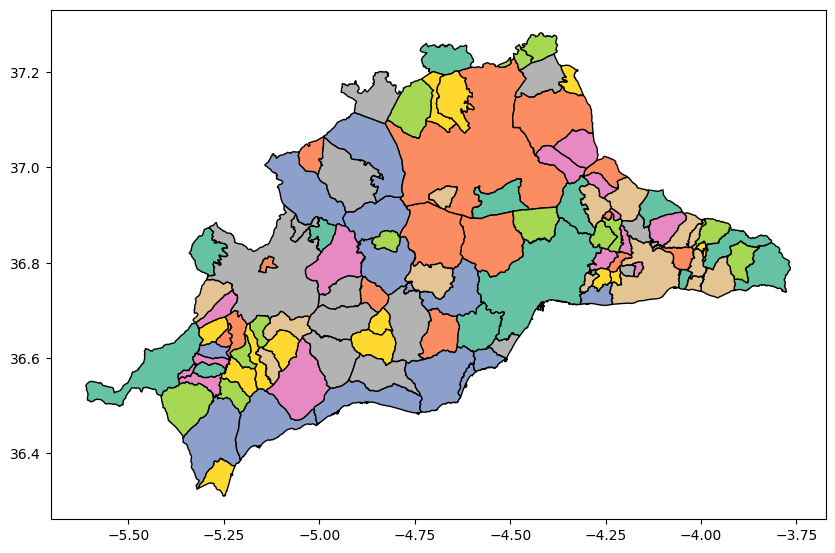

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file
gdf = gpd.read_file("C:\\Users\\stefa\\Downloads\\municipios_20250824.geojson")

# Plot the GeoDataFrame
gdf.plot(figsize=(10, 8), edgecolor="black", cmap="Set2")
plt.show()


In [50]:
display(df_selectedColumns[df_selectedColumns['municipality']=='Fuengirola']['district'].value_counts())

display(df_selectedColumns[df_selectedColumns['municipality']=='Fuengirola']['neighborhood'].value_counts())

district
Zona Puerto Deportivo    218
El Higuerón              150
Centro Ciudad             97
Playa de los Boliches     61
Torreblanca del Sol       59
Las Gaviotas              56
Zona Sohail               41
Los Boliches              31
Los Pacos                 13
Name: count, dtype: int64

neighborhood
Torreblanca        90
La Calerita        29
Carvajal           11
Las Lagunas        11
Los Pacos           9
Lomas Bajas         5
Viña Carmen         3
El Consejo          3
Don Juan Fase 1     2
Puebla Lucía        2
El Ruedo            1
Pueblo Rocio        1
Pueblo López        1
La Ponderosa        1
Name: count, dtype: int64

In [51]:
# Change municipality ti "Mijas" when neighborhood equals "Las Lagunas"
df_selectedColumns.loc[df_selectedColumns['neighborhood'] == 'Las Lagunas', 'municipality'] = 'Mijas'
# Replace "Torreblanca del Sol" with "Torreblanca" in the district column
df_selectedColumns["district"] = df_selectedColumns["district"].replace(
    {"Torreblanca del Sol": "Torreblanca"}
)

In [52]:
# Fill missing or empty neighborhood values with the corresponding district value
df_selectedColumns["neighborhood"] = df_selectedColumns["neighborhood"].where(
    df_selectedColumns["neighborhood"].notna() & (df_selectedColumns["neighborhood"] != ""),  # Keep if not NaN and not empty
    df_selectedColumns["district"]  # Otherwise, replace with district
)

In [53]:
# Count missing values in 'district' and 'neighborhood'
missing_districts = df_selectedColumns["district"].isna().sum() + (df_selectedColumns["district"] == "").sum()
missing_neighborhoods = df_selectedColumns["neighborhood"].isna().sum() + (df_selectedColumns["neighborhood"] == "").sum()

print("🔎 Missing values check:")
print(f" - District: {missing_districts} rows with empty or NaN values")
print(f" - Neighborhood: {missing_neighborhoods} rows with empty or NaN values")

🔎 Missing values check:
 - District: 0 rows with empty or NaN values
 - Neighborhood: 0 rows with empty or NaN values


### Features distributions and extreme values

We still need to fill in the missing values of priceByArea, but we’ll leave it for the end to make sure we do it using data that aren’t outliers.

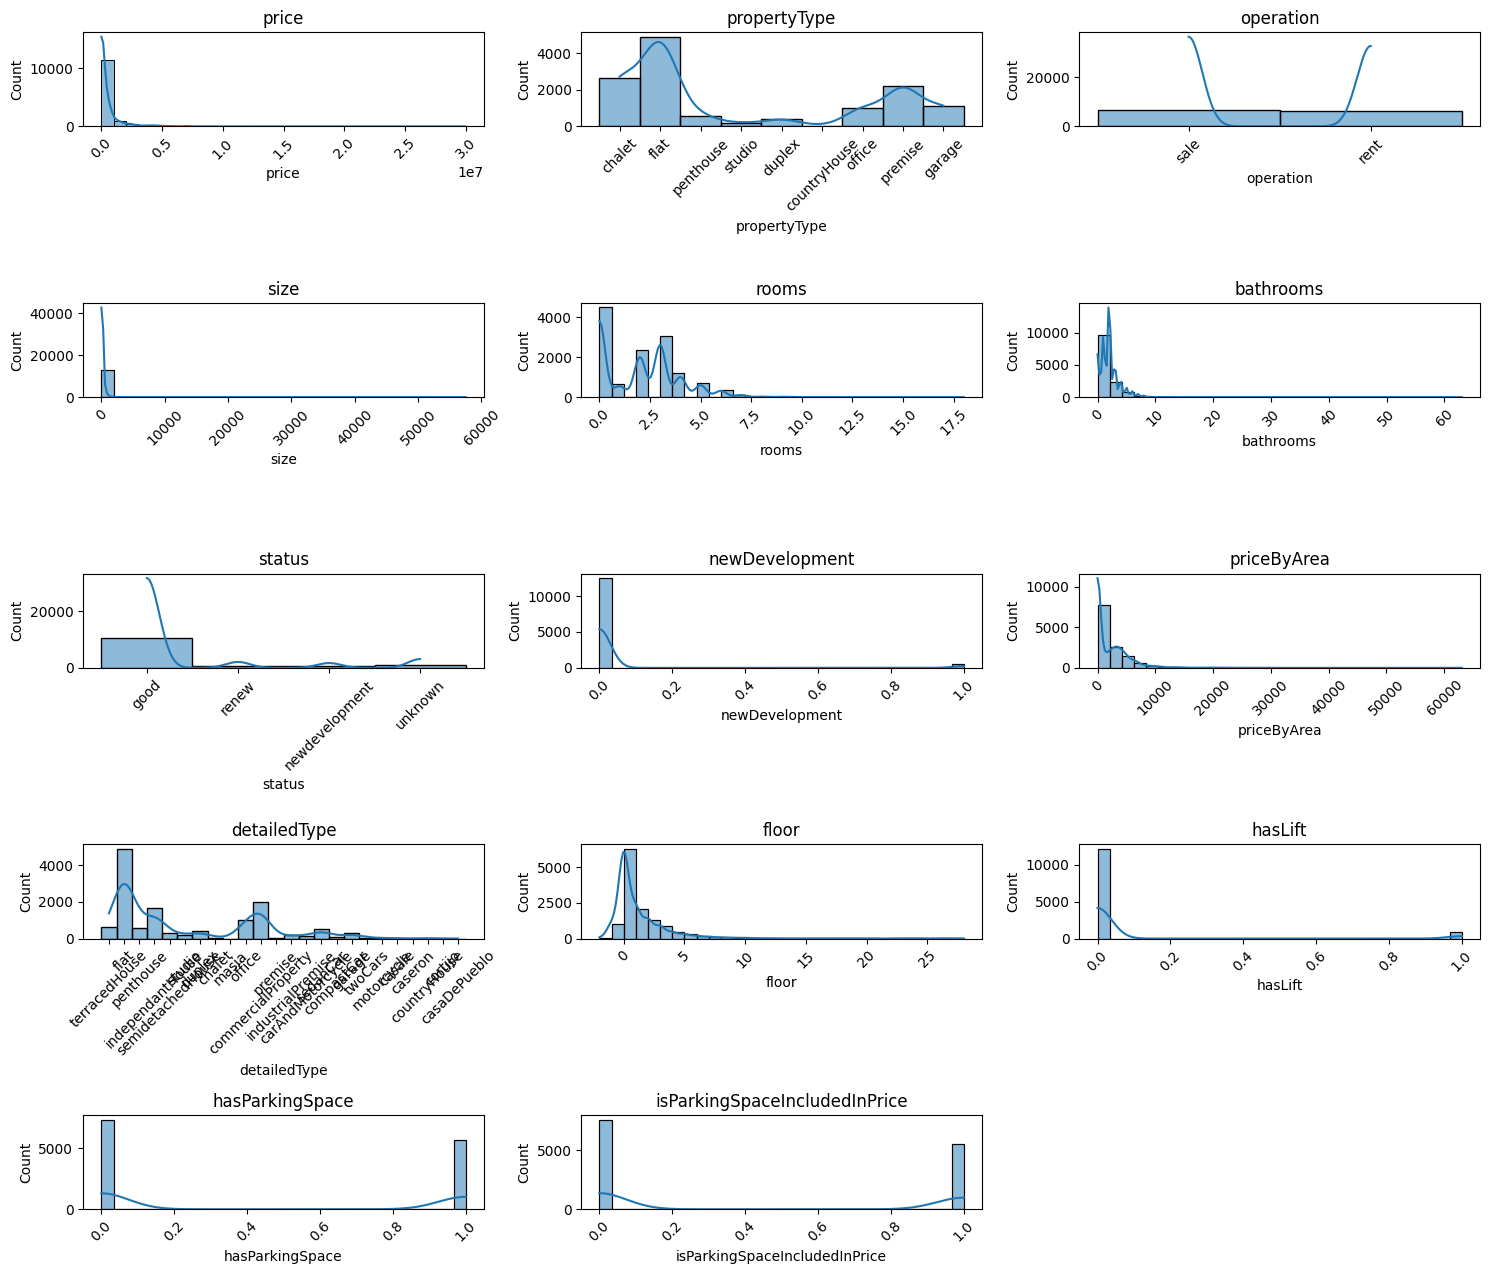

In [ ]:
import seaborn as sns
df_plot = df_selectedColumns.drop(columns = ["propertyCode", "municipality", "district", "neighborhood", "latitude", "longitude"])

features = df_plot.columns


plt.figure(figsize=(15,15)) 
for i, column in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.histplot(x=df_plot[column], kde=True, bins=30)
    plt.title(column)
    plt.xticks(rotation=45)
    plt.tight_layout()

The most extreme values at first glance are only apparent for both ``prices`` and ``bathrooms``. For bathrooms, we will remove all entries with more than 15 bathrooms. For prices, we will take a closer look at the price distributions depending on whether the operation is rent or sale.

In [55]:
# Keep only rows with 15 bathrooms or less
df_selectedColumns = df_selectedColumns[df_selectedColumns['bathrooms'] <= 15]

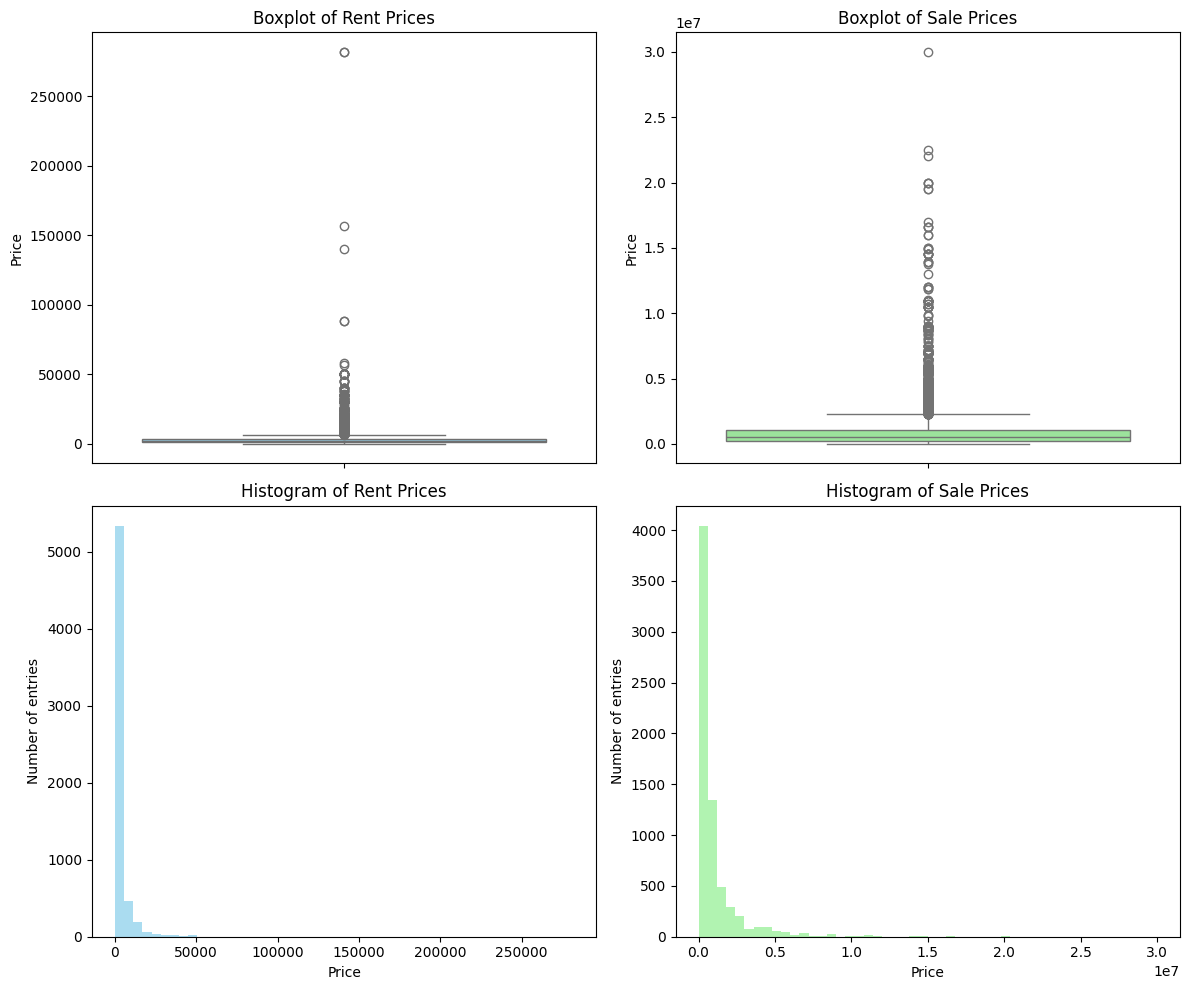

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data by operation
rent_prices = df_selectedColumns[df_selectedColumns['operation'] == 'rent']['price']
sale_prices = df_selectedColumns[df_selectedColumns['operation'] == 'sale']['price']

# Create a 2x2 figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# --- Boxplot for Rent ---
sns.boxplot(y=rent_prices, ax=axs[0,0], color='skyblue')
axs[0,0].set_title('Boxplot of Rent Prices')
axs[0,0].set_ylabel('Price')

# --- Boxplot for Sale ---
sns.boxplot(y=sale_prices, ax=axs[0,1], color='lightgreen')
axs[0,1].set_title('Boxplot of Sale Prices')
axs[0,1].set_ylabel('Price')

# --- Histogram for Rent ---
axs[1,0].hist(rent_prices, bins=50, color='skyblue', alpha=0.7)
axs[1,0].set_title('Histogram of Rent Prices')
axs[1,0].set_xlabel('Price')
axs[1,0].set_ylabel('Number of entries')

# --- Histogram for Sale ---
axs[1,1].hist(sale_prices, bins=50, color='lightgreen', alpha=0.7)
axs[1,1].set_title('Histogram of Sale Prices')
axs[1,1].set_xlabel('Price')
axs[1,1].set_ylabel('Number of entries')

# Adjust layout
plt.tight_layout()
plt.show()


We have very extreme values; therefore, we will implement the interquartile range (IQR) method to remove these outliers.

In [57]:
def filter_by_percentile(df, column, central_percent=0.75):
    """
    Filter a DataFrame to remove outliers based on a specified central percentile range.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        column (str): Column name to filter
        central_percent (float): Central portion of data to keep (between 0 and 1)
    
    Returns:
        pd.DataFrame: Filtered DataFrame
    """
    # Calculate lower and upper percentiles
    lower_quantile = (1 - central_percent) / 2
    upper_quantile = 1 - lower_quantile
    
    lower_limit = df[column].quantile(lower_quantile)
    upper_limit = df[column].quantile(upper_quantile)
    
    # Filter the DataFrame
    df_filtered = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    print(f"Filtering '{column}' to keep the central {central_percent*100:.1f}% of data")
    print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")
    print(f"Number of records before filtering: {len(df)}")
    print(f"Number of records after filtering: {len(df_filtered)}\n")
    
    return df_filtered



In [58]:
df_rental_filtered = filter_by_percentile(df_selectedColumns[df_selectedColumns['operation'] == 'rent'], 'price',0.8)
df_sale_filtered = filter_by_percentile(df_selectedColumns[df_selectedColumns['operation'] == 'sale'], 'price',0.8)

Filtering 'price' to keep the central 80.0% of data
Lower limit: 700.0, Upper limit: 7200.0
Number of records before filtering: 6174
Number of records after filtering: 4994

Filtering 'price' to keep the central 80.0% of data
Lower limit: 35000.0, Upper limit: 2490000.0
Number of records before filtering: 6881
Number of records after filtering: 5513



In [59]:
# Combine the filtered rental and sale dataframes
df_selectedColumns = pd.concat([df_rental_filtered, df_sale_filtered], ignore_index=True)

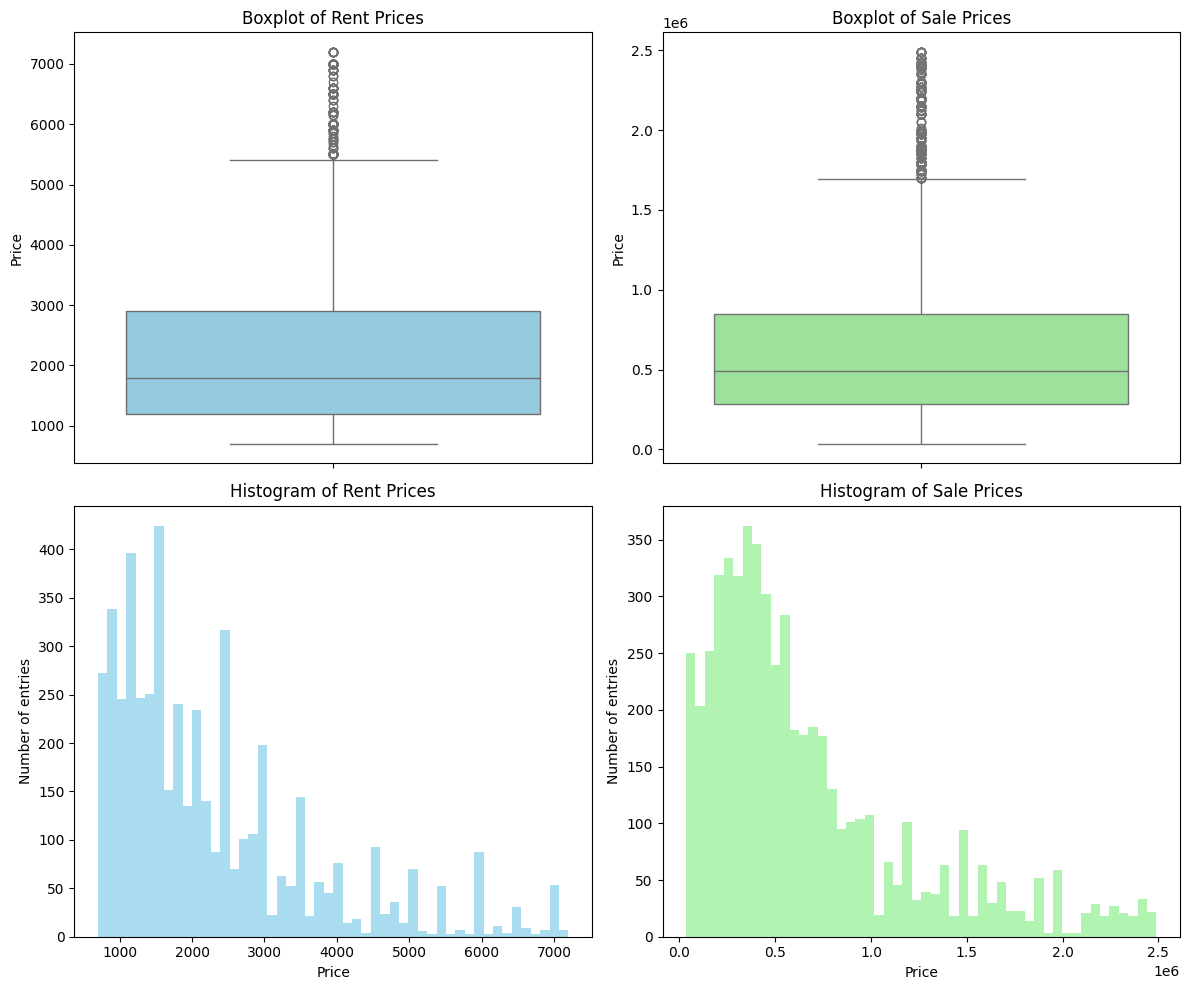

In [60]:
# Filter data by operation
rent_prices = df_selectedColumns[df_selectedColumns['operation'] == 'rent']['price']
sale_prices = df_selectedColumns[df_selectedColumns['operation'] == 'sale']['price']

# Create a 2x2 figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# --- Boxplot for Rent ---
sns.boxplot(y=rent_prices, ax=axs[0,0], color='skyblue')
axs[0,0].set_title('Boxplot of Rent Prices')
axs[0,0].set_ylabel('Price')

# --- Boxplot for Sale ---
sns.boxplot(y=sale_prices, ax=axs[0,1], color='lightgreen')
axs[0,1].set_title('Boxplot of Sale Prices')
axs[0,1].set_ylabel('Price')

# --- Histogram for Rent ---
axs[1,0].hist(rent_prices, bins=50, color='skyblue', alpha=0.7)
axs[1,0].set_title('Histogram of Rent Prices')
axs[1,0].set_xlabel('Price')
axs[1,0].set_ylabel('Number of entries')

# --- Histogram for Sale ---
axs[1,1].hist(sale_prices, bins=50, color='lightgreen', alpha=0.7)
axs[1,1].set_title('Histogram of Sale Prices')
axs[1,1].set_xlabel('Price')
axs[1,1].set_ylabel('Number of entries')

# Adjust layout
plt.tight_layout()
plt.show()


As we can observe, the data are much better distributed than before applying the interquartile range (IQR) method. With the data already filtered, we will proceed to calculate the ``priceByArea`` columns to fill in the missing values and also to be able to use this column in our app.

In [61]:
df_selectedColumns.to_csv("../data/working_data/cleaned_data_sinterminar.csv", index=False)

### Filling missing values for `priceByArea`

In [99]:
df_selectedColumns = pd.read_csv("../data/working_data/cleaned_data_sinterminar.csv")

In [100]:
df_selectedColumns.groupby('detailedType')['size'].agg(['mean','max','min'])

,mean,max,min
detailedType,,,
carAndMotorcycle,19.000000,19.0,19.0
casaDePueblo,284.000000,488.0,80.0
casale,236.750000,411.0,65.0
caseron,112.666667,140.0,99.0
chalet,271.179487,721.0,81.0
commercialProperty,188.959721,2046.0,15.0
compactCar,11.000000,11.0,11.0
cortijo,329.500000,587.0,72.0
countryHouse,284.785714,2000.0,75.0


We have created a json file containing a dictionary with bins for the sizes grouped by detailedType

In [101]:
with open("../data/size_bins_by_detailedType.json", 'r') as f:
    size_bins_by_detailedType = json.load(f)
    print(size_bins_by_detailedType)

{'carAndMotorcycle': [18.0, 19.0, 19.0, 20.0], 'casaDePueblo': [0.0, 80.0, 138.4, 196.8, 255.2, 313.6, 372.0, 430.4, 488.0, 546.4, 604.8], 'casale': [0.0, 65.0, 108.2, 151.5, 194.8, 238.0, 281.2, 324.5, 367.8, 411.0, 452.1], 'caseron': [0.0, 99.0, 109.5, 119.5, 129.5, 140.0, 153.0], 'chalet': [0.0, 81.0, 152.0, 223.0, 294.0, 365.0, 436.0, 507.0, 578.0, 649.0, 721.0, 793.1], 'commercialProperty': [0.0, 15.0, 170.5, 326.0, 481.5, 637.0, 792.5, 948.0, 1103.5, 1259.0, 1414.5, 1570.0, 1725.5, 1881.0, 2036.5, 2192.0], 'compactCar': [10.0, 11.0, 11.0, 12.0], 'cortijo': [0.0, 72.0, 130.0, 188.0, 246.0, 304.0, 362.0, 420.0, 478.0, 536.0, 587.0, 645.7], 'countryHouse': [0.0, 75.0, 294.0, 513.0, 732.0, 951.0, 1170.0, 1389.0, 1608.0, 1827.0, 2000.0, 2200.0], 'duplex': [0.0, 35.0, 263.0, 491.0, 719.0, 947.0, 1175.0, 1403.0, 1631.0, 1859.0, 2087.0, 2315.0, 2543.0, 2771.0, 2999.0, 3100.0, 3410.0], 'flat': [0.0, 25.0, 148.0, 271.0, 394.0, 517.0, 640.0, 763.0, 886.0, 1009.0, 1132.0, 1255.0, 1346.9, 148

In [ ]:
def assign_size_range(row):
    detailed_type = row['detailedType']
    size = row['size']
    bins = size_bins_by_detailedType.get(detailed_type)

    if bins is None:
        return 'Unknown'

    # Asegurar que sea una lista, ordenada y sin duplicados
    bins = sorted(set(bins))
    
    # Asegurar que cubra todos los valores
    if bins[-1] != float('inf'):
        bins = bins + [float('inf')]

    labels = [
        f"{int(bins[i])}-{int(bins[i+1])}" if bins[i+1] != float('inf')
        else f"{int(bins[i])}+"
        for i in range(len(bins)-1)
    ]

    cat = pd.cut([size], bins=bins, labels=labels, include_lowest=True)

    return cat[0] if not pd.isna(cat[0]) else 'Unknown'
    

df_selectedColumns.loc[:, 'size_range'] = df_selectedColumns.apply(assign_size_range, axis=1)


In [103]:
df_selectedColumns

,propertyCode,price,propertyType,operation,size,rooms,bathrooms,municipality,district,neighborhood,...,longitude,status,newDevelopment,priceByArea,detailedType,floor,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice,size_range
0,108046139,1500,flat,rent,95.0,2.0,2.0,Málaga,Centro,Perchel norte,...,-4.430273,good,False,16.0,flat,3.0,0,False,False,25-148
1,106524431,1000,flat,rent,30.0,1.0,1.0,Málaga,Centro,Centro Histórico,...,-4.422324,good,False,33.0,flat,4.0,0,False,False,25-148
2,96624123,1200,flat,rent,100.0,3.0,1.0,Málaga,Centro,La Trinidad,...,-4.431447,good,False,12.0,flat,2.0,0,False,False,25-148
3,89268889,2000,flat,rent,140.0,3.0,2.0,Málaga,Centro,Centro Histórico,...,-4.417712,good,False,14.0,flat,2.0,0,False,False,25-148
4,108039878,1300,flat,rent,75.0,2.0,1.0,Málaga,Centro,Cristo de la Epidemia,...,-4.415604,good,False,17.0,flat,3.0,0,False,False,25-148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10502,107437392,1375000,chalet,sale,264.0,3.0,3.0,Marbella,Las Chapas-El Rosario,El Rosario-Ricmar,...,-4.802938,good,False,5208.0,independantHouse,0.0,0,True,True,240-451
10503,108160457,539000,penthouse,sale,125.0,2.0,2.0,Estepona,Benamara - Atalaya,Atalaya-Isdabe,...,-5.019476,good,False,4312.0,penthouse,2.0,0,False,False,Unknown
10504,107866098,1295000,chalet,sale,204.0,3.0,2.0,Marbella,Elviria-Cabopino,Elviria,...,-4.783551,good,False,6348.0,independantHouse,0.0,0,True,True,29-240
10505,104553824,2195000,chalet,sale,240.0,4.0,3.0,Marbella,Elviria-Cabopino,Elviria,...,-4.783793,good,False,9146.0,independantHouse,0.0,0,True,True,29-240


In [113]:
df_selectedColumns['avg_price_area'] = df_selectedColumns.groupby(
    ['operation','status', 'propertyType','size_range', 'municipality', 'district', 'neighborhood'], observed=True
)['priceByArea'].transform('mean')

# df_selectedColumns['avg_price_area'] = df_selectedColumns['avg_price_area'].fillna(
#     df_selectedColumns.groupby(['operation', 'detailedType','size_range'])['priceByArea'].transform('mean')
# )

#Fill nan values in priceByArea with the value in avg_price_area_by_type_size_neigh
df_selectedColumns['priceByArea_filled'] = df_selectedColumns['priceByArea'].fillna(df_selectedColumns['avg_price_area'])

df_selectedColumns['diff_priceByArea_avgPrice'] = df_selectedColumns['priceByArea_filled'] - df_selectedColumns['avg_price_area']

In [114]:
df_selectedColumns = df_selectedColumns.drop_duplicates()
df_selectedColumns

,propertyCode,price,propertyType,operation,size,rooms,bathrooms,municipality,district,neighborhood,...,priceByArea,detailedType,floor,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice,size_range,avg_price_area,priceByArea_filled,diff_priceByArea_avgPrice
0,108046139,1500,flat,rent,95.0,2.0,2.0,Málaga,Centro,Perchel norte,...,16.0,flat,3.0,0,False,False,25-148,19.000000,16.0,-3.000000
1,106524431,1000,flat,rent,30.0,1.0,1.0,Málaga,Centro,Centro Histórico,...,33.0,flat,4.0,0,False,False,25-148,22.202532,33.0,10.797468
2,96624123,1200,flat,rent,100.0,3.0,1.0,Málaga,Centro,La Trinidad,...,12.0,flat,2.0,0,False,False,25-148,16.400000,12.0,-4.400000
3,89268889,2000,flat,rent,140.0,3.0,2.0,Málaga,Centro,Centro Histórico,...,14.0,flat,2.0,0,False,False,25-148,22.202532,14.0,-8.202532
4,108039878,1300,flat,rent,75.0,2.0,1.0,Málaga,Centro,Cristo de la Epidemia,...,17.0,flat,3.0,0,False,False,25-148,15.538462,17.0,1.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10502,107437392,1375000,chalet,sale,264.0,3.0,3.0,Marbella,Las Chapas-El Rosario,El Rosario-Ricmar,...,5208.0,independantHouse,0.0,0,True,True,240-451,5469.500000,5208.0,-261.500000
10503,108160457,539000,penthouse,sale,125.0,2.0,2.0,Estepona,Benamara - Atalaya,Atalaya-Isdabe,...,4312.0,penthouse,2.0,0,False,False,Unknown,3518.250000,4312.0,793.750000
10504,107866098,1295000,chalet,sale,204.0,3.0,2.0,Marbella,Elviria-Cabopino,Elviria,...,6348.0,independantHouse,0.0,0,True,True,29-240,8213.333333,6348.0,-1865.333333
10505,104553824,2195000,chalet,sale,240.0,4.0,3.0,Marbella,Elviria-Cabopino,Elviria,...,9146.0,independantHouse,0.0,0,True,True,29-240,8213.333333,9146.0,932.666667


In [121]:
df_selectedColumns = df_selectedColumns.dropna(subset=['priceByArea_filled'])

In [122]:
df_selectedColumns['diff_priceByArea_avgPrice'].describe()

count    7.526000e+03
mean     1.812705e-16
std      8.967172e+02
min     -2.721800e+04
25%     -4.500000e+00
50%      0.000000e+00
75%      2.500000e+00
max      2.721800e+04
Name: diff_priceByArea_avgPrice, dtype: float64

In [123]:
# Separar alquiler y venta
rent_rows = df_selectedColumns['operation'] == 'rent'
sale_rows = df_selectedColumns['operation'] == 'sale'

# Filtrar por los rangos respectivos
rent_within_range = df_selectedColumns.loc[rent_rows, 'diff_priceByArea_avgPrice'].between(-50, 50)
sale_within_range = df_selectedColumns.loc[sale_rows, 'diff_priceByArea_avgPrice'].between(-1000, 1000)

# Calcular porcentaje
rent_percentage = rent_within_range.mean() * 100
sale_percentage = sale_within_range.mean() * 100

print(f"Percentage of rental rows with difference between -50 and 50: {rent_percentage:.2f}%")
print(f"Percentage of sale rows with difference between -1000 and 1000: {sale_percentage:.2f}%")

Percentage of rental rows with difference between -50 and 50: 99.73%
Percentage of sale rows with difference between -1000 and 1000: 83.20%


In [124]:
df_selectedColumns['priceByArea'] = df_selectedColumns['priceByArea_filled']

# 
df_selectedColumns = df_selectedColumns.drop(columns=['propertyCode', 'avg_price_area', 'priceByArea_filled', 'diff_priceByArea_avgPrice', 'size_range'])

C:\Users\stefa\AppData\Local\Temp\ipykernel_19920\76704137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selectedColumns['priceByArea'] = df_selectedColumns['priceByArea_filled']


In [125]:
df_selectedColumns.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7526 entries, 0 to 10506
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          7526 non-null   int64  
 1   propertyType                   7526 non-null   object 
 2   operation                      7526 non-null   object 
 3   size                           7526 non-null   float64
 4   rooms                          7526 non-null   float64
 5   bathrooms                      7526 non-null   float64
 6   municipality                   7526 non-null   object 
 7   district                       7526 non-null   object 
 8   neighborhood                   7526 non-null   object 
 9   latitude                       7526 non-null   float64
 10  longitude                      7526 non-null   float64
 11  status                         7526 non-null   object 
 12  newDevelopment                 7526 non-null   bool 

### Further feature analysis

In order to better understand the data and to check that the selected columns are the appropiate ones we will plot the correlation matrix and make a principal component analysis. To do so, it is necesary to have all the features numerical.

In [ ]:
df_numeric = df_selectedColumns.copy()

from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in df_numeric.select_dtypes(include=["object","bool"]).columns:
    le = LabelEncoder()
    df_numeric[col] = le.fit_transform(df_numeric[col])
    encoders[col] = le  


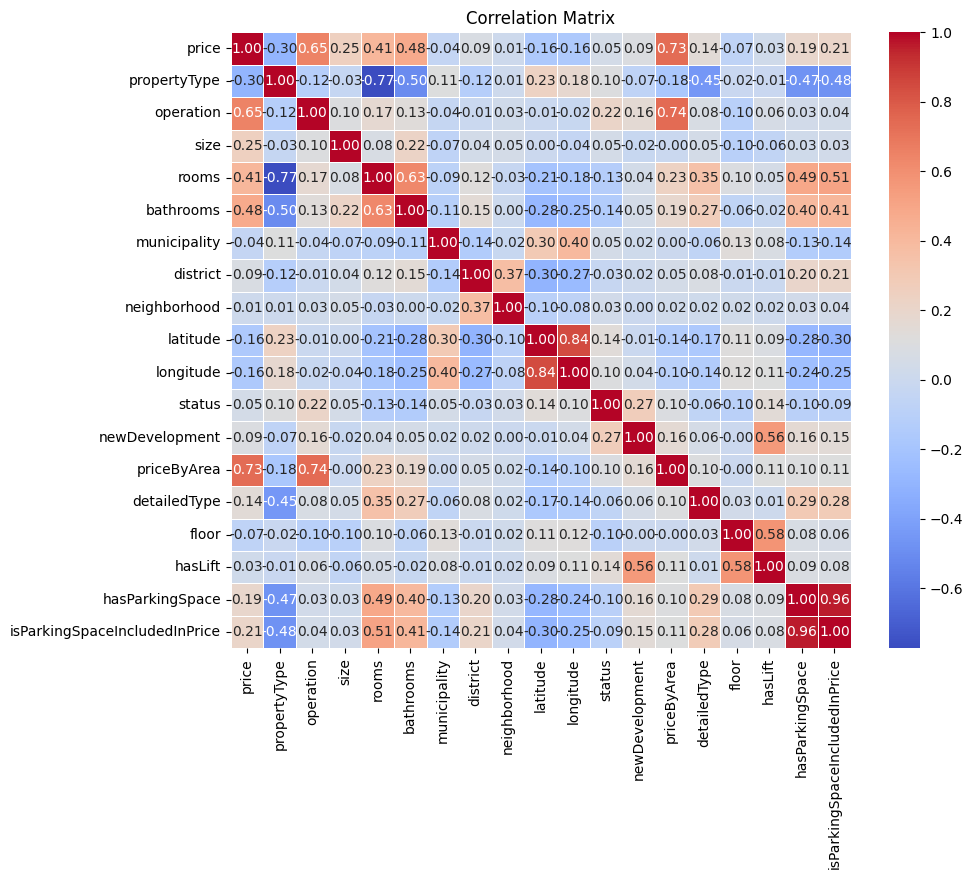

In [128]:
# Correlation matrix
corr = df_numeric.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Based on this correlation matrix we conclude that ``isPrkingSpaceIncludedInPrice`` provides redundant information so we are not goint to consider it.

In [136]:
df_selectedColumns = df_selectedColumns.drop(columns=['isParkingSpaceIncludedInPrice'])
df_selectedColumns.to_csv("../data/working_data/data_cleaned_20250901.csv", index=False)

In [ ]:
df_numeric = df_numeric.drop(columns=['isParkingSpaceIncludedInPrice'])

Ahora hacemos el analisis de las componentes principales

In [138]:
# We need to scale the data before PCA
from sklearn.preprocessing import StandardScaler

X = df_numeric.drop(columns=['price'])


In [139]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7526 entries, 0 to 7525
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   propertyType     7526 non-null   int64  
 1   operation        7526 non-null   int64  
 2   size             7526 non-null   float64
 3   rooms            7526 non-null   float64
 4   bathrooms        7526 non-null   float64
 5   municipality     7526 non-null   int64  
 6   district         7526 non-null   int64  
 7   neighborhood     7526 non-null   int64  
 8   latitude         7526 non-null   float64
 9   longitude        7526 non-null   float64
 10  status           7526 non-null   int64  
 11  newDevelopment   7526 non-null   int64  
 12  priceByArea      7526 non-null   float64
 13  detailedType     7526 non-null   int64  
 14  floor            7526 non-null   float64
 15  hasLift          7526 non-null   int64  
 16  hasParkingSpace  7526 non-null   int64  
dtypes: float64(7),

In [140]:
standardized = StandardScaler()
standardized.fit(X)
scaled_data = standardized.transform(X)
X = scaled_data
X.shape

(7526, 17)

In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 17)                          
pca.fit(X)   

PCA(n_components=17)

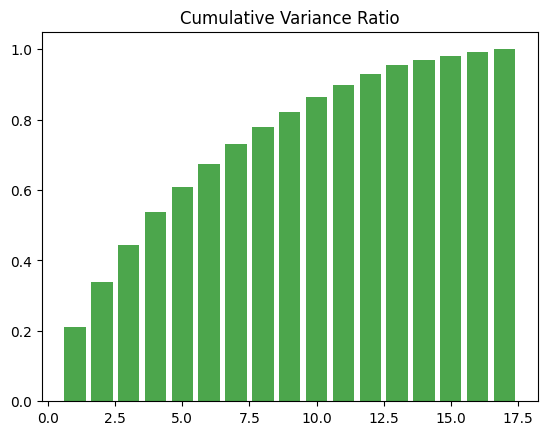

In [143]:
import numpy as np
# Visualize the CVRs as a Barplot.
CVRs = np.cumsum(pca.explained_variance_ratio_)        # Calculate the CVRs.
nPCs = np.arange(17)+1                                 # Define an array that corresponds to the number of PCs.
plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)  
plt.title('Cumulative Variance Ratio')
plt.show()